Import Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split

Read_Data

In [2]:
data_test = pd.read_csv('Dataset/test.csv')
data_train = pd.read_csv('Dataset/train.csv')

EDA

In [3]:
data_test.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,4,A,B,A,A,A,A,A,A,B,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,6,A,B,A,B,A,A,A,A,B,...,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,9,A,B,A,B,B,A,B,A,B,...,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,12,A,A,A,A,B,A,A,A,A,...,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,15,B,A,A,A,A,B,A,A,A,...,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


In [4]:
data_test.shape

(125546, 131)

In [5]:
data_test.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
count,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000
mean,294067.153442,0.494447,0.506939,0.498255,0.492334,0.487640,0.492188,0.485945,0.487401,0.486015,0.498909,0.494360,0.494033,0.495086,0.495586
std,170098.335649,0.187961,0.206837,0.201746,0.210815,0.209119,0.205574,0.178650,0.199549,0.182134,0.185950,0.210399,0.210148,0.213108,0.222613
min,4.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.178568
25%,146414.250000,0.347403,0.358319,0.336963,0.327354,0.281143,0.336105,0.352087,0.317960,0.358970,0.364580,0.310961,0.318249,0.315758,0.294752
50%,294306.000000,0.475784,0.555782,0.527991,0.452887,0.422268,0.441525,0.438893,0.441060,0.441450,0.466720,0.457203,0.462286,0.363547,0.406104
75%,441800.000000,0.626630,0.681761,0.634224,0.652072,0.643315,0.659261,0.591284,0.629180,0.568890,0.619840,0.678924,0.682413,0.689974,0.724791
max,587634.000000,0.984975,0.862654,0.944251,0.956046,0.983107,0.997162,1.000000,0.982800,0.995400,0.994980,0.997830,0.997416,0.988494,0.844814


In [6]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125546 entries, 0 to 125545
Columns: 131 entries, id to cont14
dtypes: float64(14), int64(1), object(116)
memory usage: 125.5+ MB


In [7]:
data_test.isnull().sum().sum()

0

Separate Test & Train Data

In [8]:
data_train['isTrain'] = True
data_test['isTrain'] = False

Concat Two Datasets

In [9]:
traintest = pd.concat([data_train, data_test], axis=0)
traintest.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss,isTrain
0,1,A,B,A,B,A,A,A,A,B,...,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18,True
1,2,A,B,A,A,A,A,A,A,B,...,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60,True
2,5,A,B,A,A,B,A,A,A,B,...,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09,True
3,10,B,B,A,B,A,A,A,A,B,...,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85,True
4,11,A,B,A,B,A,A,A,A,B,...,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85,True


In [10]:
traintest.tail()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss,isTrain
125541,587617,A,A,A,B,A,A,A,A,A,...,0.815941,0.39455,0.48740,0.40666,0.550529,0.538473,0.298734,0.345946,NaN,False
125542,587621,A,A,A,A,B,B,A,B,A,...,0.424968,0.47669,0.25753,0.26894,0.324486,0.352251,0.490001,0.290576,NaN,False
125543,587627,B,B,A,A,B,A,A,A,B,...,0.511502,0.72299,0.94438,0.83510,0.933174,0.926619,0.848129,0.808125,NaN,False
125544,587629,A,A,A,A,A,B,A,B,A,...,0.388545,0.31796,0.32128,0.36974,0.307628,0.301921,0.608259,0.361542,NaN,False
125545,587634,A,B,A,A,A,A,A,A,B,...,0.242044,0.25461,0.31399,0.25183,0.245410,0.241676,0.287682,0.220323,NaN,False


Sorte All The Columns (Categorical Or Numerical)

In [11]:
cat_pattern = re.compile("^cat([1-9]|[1-9][0-9]|[1-9][0-9][0-9])$")
cont_pattern = re.compile("^cont([1-9]|[1-9][0-9]|[1-9][0-9][0-9])$")
cat_col = sorted([cat for cat in data_train.columns if 'cat' in cat], key=lambda s: int(s[3:]))
cat_col

['cat1',
 'cat2',
 'cat3',
 'cat4',
 'cat5',
 'cat6',
 'cat7',
 'cat8',
 'cat9',
 'cat10',
 'cat11',
 'cat12',
 'cat13',
 'cat14',
 'cat15',
 'cat16',
 'cat17',
 'cat18',
 'cat19',
 'cat20',
 'cat21',
 'cat22',
 'cat23',
 'cat24',
 'cat25',
 'cat26',
 'cat27',
 'cat28',
 'cat29',
 'cat30',
 'cat31',
 'cat32',
 'cat33',
 'cat34',
 'cat35',
 'cat36',
 'cat37',
 'cat38',
 'cat39',
 'cat40',
 'cat41',
 'cat42',
 'cat43',
 'cat44',
 'cat45',
 'cat46',
 'cat47',
 'cat48',
 'cat49',
 'cat50',
 'cat51',
 'cat52',
 'cat53',
 'cat54',
 'cat55',
 'cat56',
 'cat57',
 'cat58',
 'cat59',
 'cat60',
 'cat61',
 'cat62',
 'cat63',
 'cat64',
 'cat65',
 'cat66',
 'cat67',
 'cat68',
 'cat69',
 'cat70',
 'cat71',
 'cat72',
 'cat73',
 'cat74',
 'cat75',
 'cat76',
 'cat77',
 'cat78',
 'cat79',
 'cat80',
 'cat81',
 'cat82',
 'cat83',
 'cat84',
 'cat85',
 'cat86',
 'cat87',
 'cat88',
 'cat89',
 'cat90',
 'cat91',
 'cat92',
 'cat93',
 'cat94',
 'cat95',
 'cat96',
 'cat97',
 'cat98',
 'cat99',
 'cat100',
 'cat101

In [12]:
cat_index = [i for i in range(0, len(data_train.columns)) if cat_pattern.match(data_train.columns[i])]
cat_index

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116]

In [13]:
cont_col = sorted([cont for cont in data_train.columns if 'cont' in cont], key=lambda s: int(s[4:]))
cont_col

['cont1',
 'cont2',
 'cont3',
 'cont4',
 'cont5',
 'cont6',
 'cont7',
 'cont8',
 'cont9',
 'cont10',
 'cont11',
 'cont12',
 'cont13',
 'cont14']

In [14]:
cont_index = [i for i in range(0, len(data_train.columns)) if cont_pattern.match(data_train.columns[i])]
cont_index

[117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130]

Show All The Plots

C:\Users\Saeed\AppData\Local\Temp\ipykernel_12004\216768969.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_train['loss'])


<Axes: xlabel='loss', ylabel='Density'>

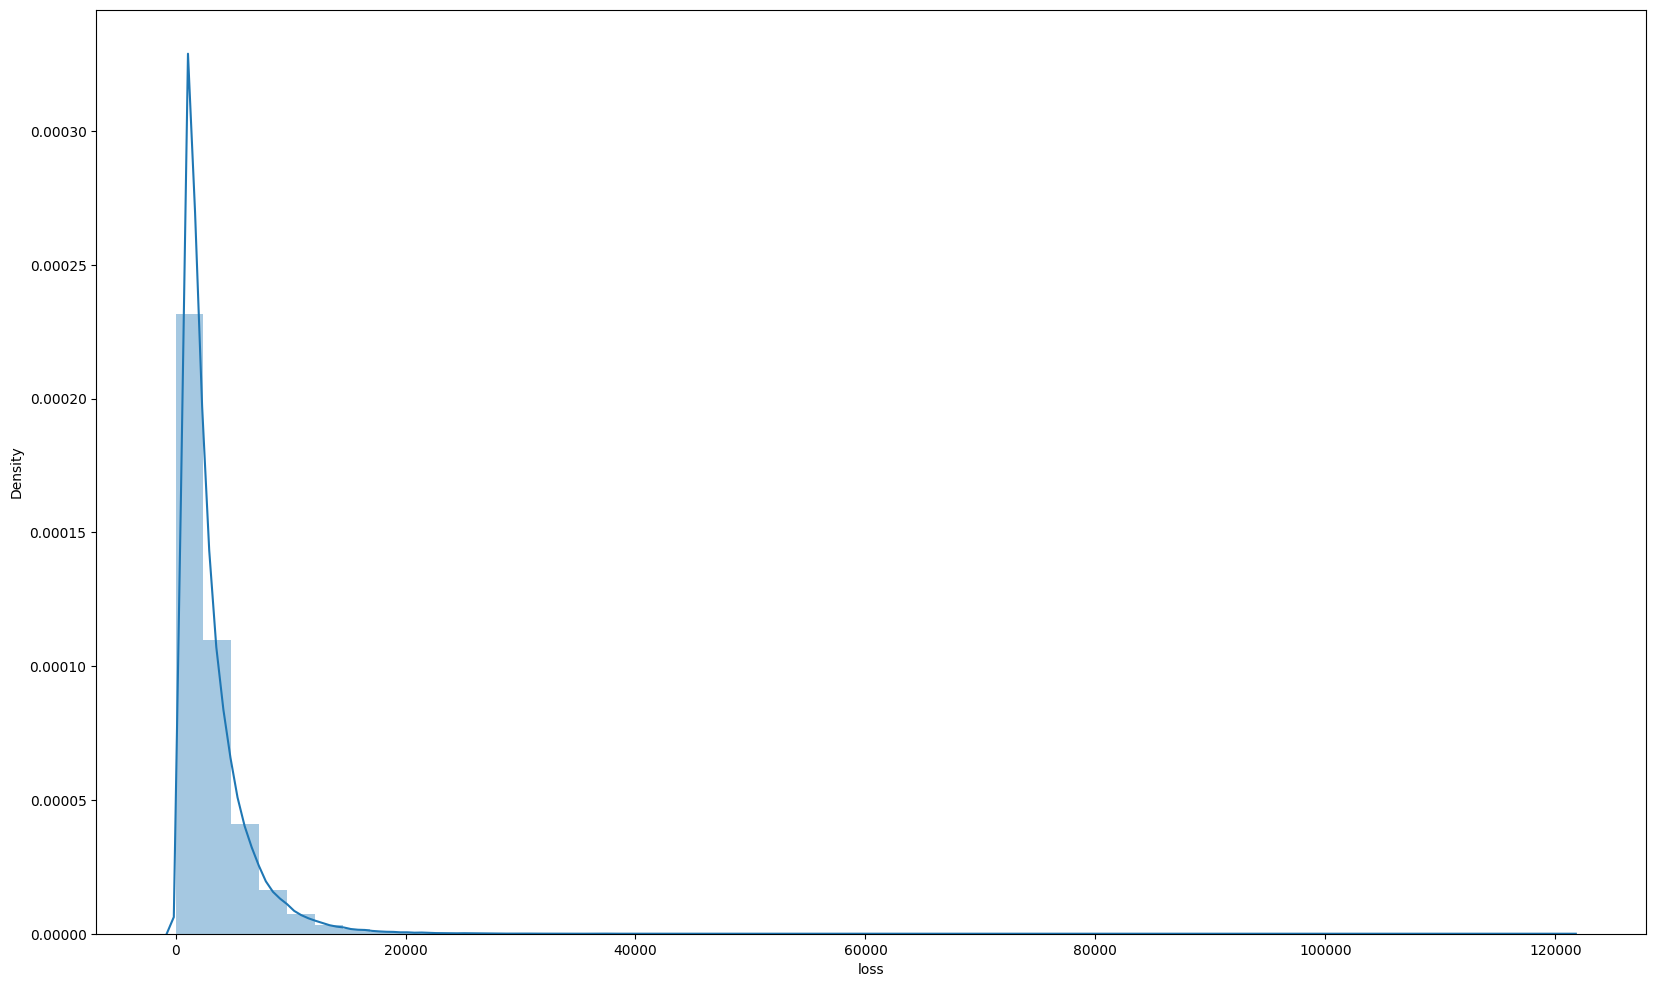

In [15]:
plt.figure(figsize=(20, 12))
sns.distplot(data_train['loss'])

Removing Skewness

C:\Users\Saeed\AppData\Local\Temp\ipykernel_12004\209298343.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(data_train['loss']))


<Axes: xlabel='loss', ylabel='Density'>

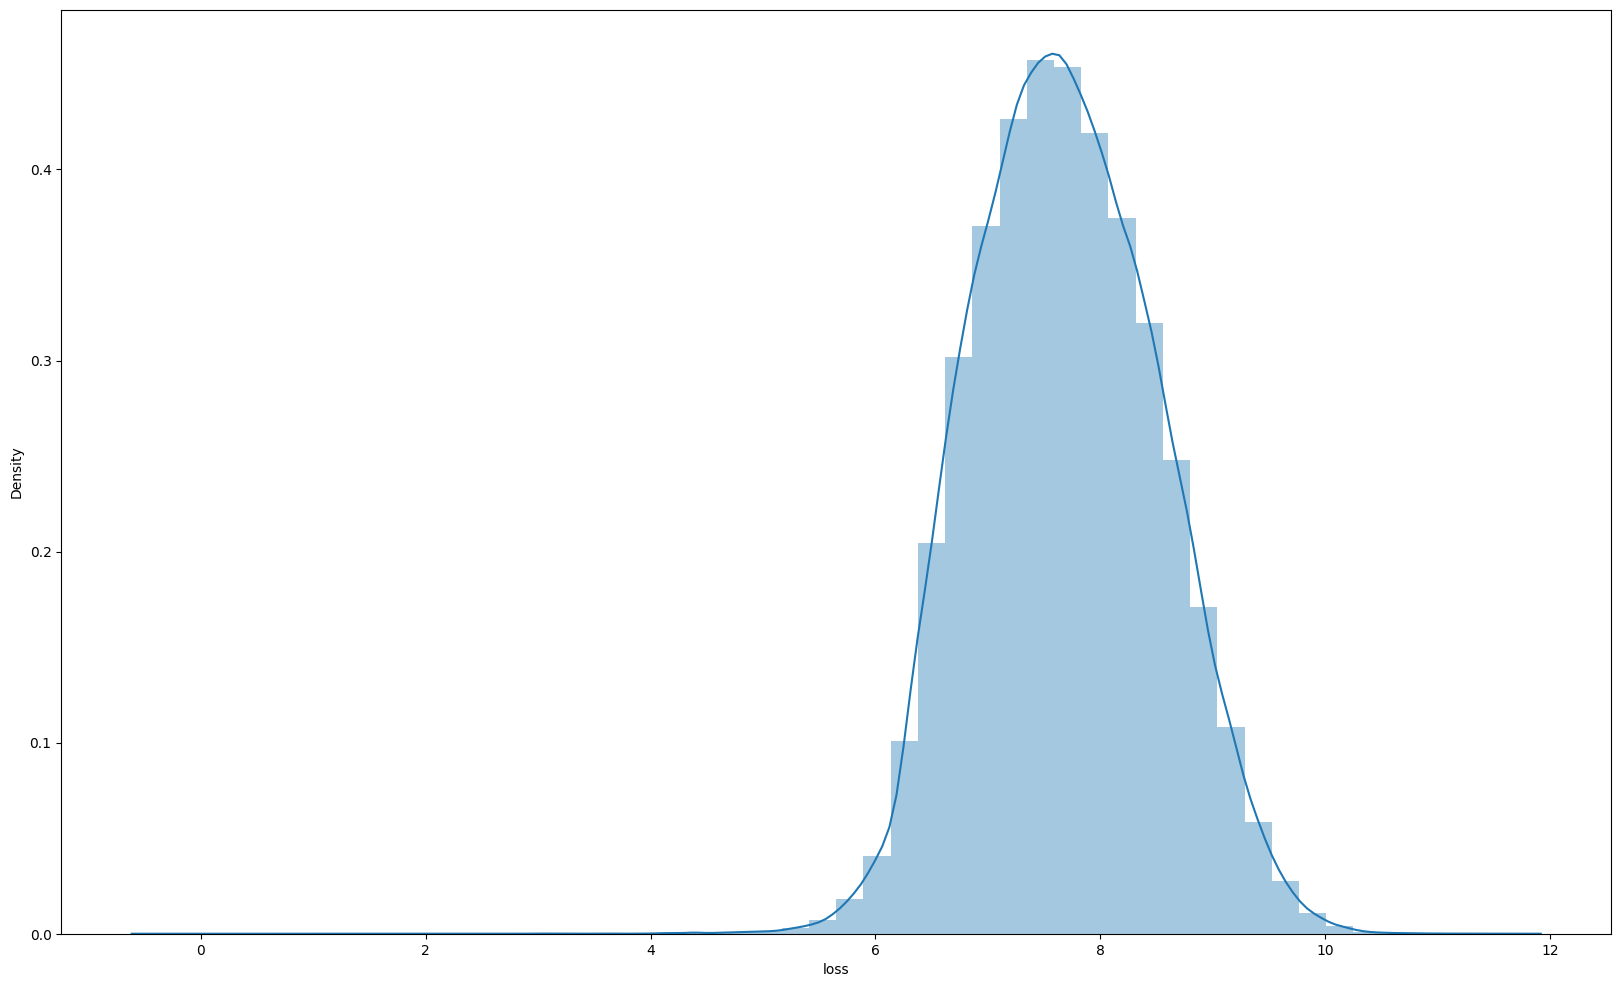

In [16]:
plt.figure(figsize=(20, 12))
sns.distplot(np.log(data_train['loss']))

Create Model For Prediction

In [17]:
model = CatBoostRegressor(iterations=200, learning_rate=0.05, depth=6, eval_metric='MAE', verbose=10)

Section Train_Test_Split

In [18]:
X = data_train.drop(['id', 'loss', 'isTrain'], axis=1)
y = np.log(data_train['loss'])
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [19]:
np.shape(X)

(188318, 130)

In [20]:
X.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,A,B,A,B,A,A,A,A,B,A,...,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843
1,A,B,A,A,A,A,A,A,B,B,...,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496
2,A,B,A,A,B,A,A,A,B,B,...,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425
3,B,B,A,B,A,A,A,A,B,A,...,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642
4,A,B,A,B,A,A,A,A,B,B,...,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606


In [21]:
np.asarray(cat_index) - 1

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115])

In [22]:
model.fit(X_train, y_train, np.asarray(cat_index) - 1, eval_set=(X_test, y_test))

0:	learn: 0.6464155	test: 0.6506531	best: 0.6506531 (0)	total: 3.09s	remaining: 10m 15s
10:	learn: 0.5608367	test: 0.5635687	best: 0.5635687 (10)	total: 19.6s	remaining: 5m 36s
20:	learn: 0.5156468	test: 0.5178467	best: 0.5178467 (20)	total: 38.6s	remaining: 5m 28s
30:	learn: 0.4897827	test: 0.4915398	best: 0.4915398 (30)	total: 57.5s	remaining: 5m 13s
40:	learn: 0.4739683	test: 0.4754294	best: 0.4754294 (40)	total: 1m 15s	remaining: 4m 51s
50:	learn: 0.4629522	test: 0.4642581	best: 0.4642581 (50)	total: 1m 38s	remaining: 4m 47s
60:	learn: 0.4551896	test: 0.4564020	best: 0.4564020 (60)	total: 2m	remaining: 4m 33s
70:	learn: 0.4493571	test: 0.4504328	best: 0.4504328 (70)	total: 2m 15s	remaining: 4m 6s
80:	learn: 0.4448976	test: 0.4458841	best: 0.4458841 (80)	total: 2m 32s	remaining: 3m 44s
90:	learn: 0.4416314	test: 0.4424932	best: 0.4424932 (90)	total: 2m 47s	remaining: 3m 21s
100:	learn: 0.4390071	test: 0.4398232	best: 0.4398232 (100)	total: 3m 4s	remaining: 3m 1s
110:	learn: 0.436781

Now We Should Calculate Exponential Value Of Loss

In [23]:
np.exp(0.4279280583)

1.5340757129828764

For Manage Our Hardware Resources, We Can Define Our Trained Model Into the .inpyb File And Just Call That In Ther Another File For Using.

In [24]:
import pickle
with open('catboost_regression', 'wb') as f:
    pickle.dump(model, f)